# Logistic Regression

1. [Load Data](#data)
2. [Standardize Dataset](#standard)
3. [Visualize Data](#plot)
4. [Add Intercept](#intercept)
5. [Initialization of Parameters](#initial)
6. [Sigmoid Function](#sigmoid)
7. [Cost Function](#cost)
8. [Gradient Descent](#gradient)
9. [Make Predictions](#predict)
10. [Merge All Functions](#merge)

## Load Data <a name="data"></a>

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pylab
dat = np.loadtxt('datasets/ex2data1.txt', delimiter = ',')

In [3]:
X = dat[:, :2]
y = dat[:, [2]]
print("Number of examples: {}".format(y.shape[0]))
print("Number of features: {}".format(X.shape[1]))

Number of examples: 100
Number of features: 2


## Standardize Dataset <a name='standard'></a>

In [4]:
X /= 100

## Visualize Data <a name="plot"></a>

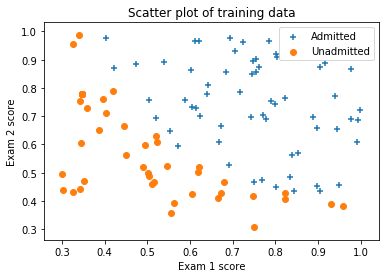

In [5]:
pos = np.where(y == 1)
neg = np.where(y == 0)
p = plt.scatter(X[pos,0], X[pos,1], marker = '+')
n = plt.scatter(X[neg,0], X[neg,1], marker = 'o')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Scatter plot of training data')
plt.legend((p, n), ('Admitted', 'Unadmitted'), loc = 'upper right')
plt.show()

## Add Intercept <a name="intercept"></a>

In [6]:
def addintercept(X):
    N = X.shape[0]
    X = np.hstack((np.ones((N, 1)), X))
    return X

## Initialization of Parameters<a name="initial"></a>

In [7]:
def initialwzeros(dim):
    return np.zeros((dim, 1))

## Sigmoid Function <a name ="sigmoid"></a>

In [8]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

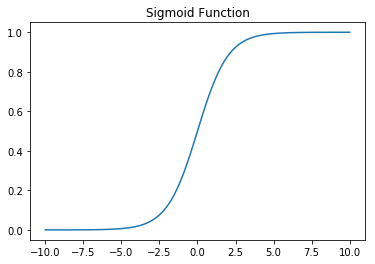

In [9]:
a = np.linspace(-10, 10, 100)  # 100 evenly-spaced values from -10 to 10
b = sigmoid(a)
plt.plot(a, b)
plt.title('Sigmoid Function')
plt.show()

## Cost Function<a name="cost"></a>

$$
J(\theta)=\frac{1}{N}\sum_{i=1}^N L(\hat{y}^{(i)},y^{(i)})
$$
- $\hat{y}=sigmoid(\theta^Tx)=h_{\theta}(x)$
- $L(a,y)=-\log\left[a^y (1-a)^{1-y}\right]=-y\log a-(1-y)\log(1-a)$

---------

### Vectorization

- $a = sigmoid(X\theta)$
- $J = -\left(y^T\log a +(\mathbf{1}-y)^T\log(\mathbf{1}-a)\right)/N$

## Gradient Descent<a name="gradient"></a>

$$
\theta \leftarrow \theta-\frac{\alpha}{N} X^T (h_{\theta}(X)-y)
$$

In [10]:
def costAndGradient(X, y, theta):
    a = sigmoid(np.dot(X, theta))
    cost = - np.mean(y * np.log(a) + (1 - y) * np.log(1 - a))
        
    grad = np.dot(X.T, a - y)/len(y)

    d = {"cost":cost,
         "grad":grad}
    return d

In [11]:
def optimize(X, y, theta, learning_rate, iterations):
    J = []
    for i in range(iterations):
        d = costAndGradient(X, y, theta)
        theta -= learning_rate * d["grad"]
        J.append(d["cost"])
    return theta, J

## Make Predictions <a name="predict"></a>

In [12]:
def predict(X, theta):
    X_int = addintercept(X)
    p = sigmoid(np.dot(X_int, theta))
    return (p > 0.5)

## Merge all Function <a name="merge"></a>

In [13]:
def model(X, y, iterations = 5000, learning_rate = 2.5):
    # add intercept
    X_int = addintercept(X)
    
    # initializing params
    theta = initialwzeros(X_int.shape[1])
    
    # optimization with gradient descent
    [theta, cost_hist] = optimize(X_int, y, theta, learning_rate, iterations)
    
    d = {"costs": cost_hist,
         "theta": theta,
         "learning_rate": learning_rate,
         "iterations": iterations}
    return d

In [14]:
d = model(X, y)

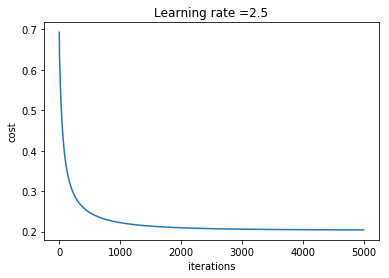

In [15]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

In [16]:
theta_last = d["theta"]
theta_last

array([[-23.41028488],
       [ 19.22027081],
       [ 18.72485191]])

In [17]:
d["costs"][-1]

0.2039837374628911

### Accuracy on the Training Set

In [18]:
np.mean(y == predict(X, theta_last))

0.89

### Plot Decision Boundary

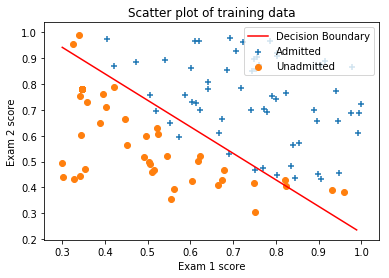

In [19]:
plot_x = [min(X[:,0]), max(X[:,1])]
plot_y = -(theta_last[0] + theta_last[1] * plot_x)/theta_last[2]
a, = plt.plot(plot_x, plot_y, 'r')
pos = np.where(y == 1)
neg = np.where(y == 0)
p = plt.scatter(X[pos,0], X[pos,1], marker = '+')
n = plt.scatter(X[neg,0], X[neg,1], marker = 'o')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Scatter plot of training data')
plt.legend((a, p, n), ('Decision Boundary', 'Admitted', 'Unadmitted'), loc = 'upper right')
plt.show()